In [357]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
# Set display option to show all columns
pd.set_option('display.max_columns', None)

In [358]:
import os
import pandas as pd

# Danh sách lưu các DataFrame
dfs = []
folder_path = r"C:\Users\ADMIN\Desktop\DEEP LEARNING MATERIAL\WEB SCRAPING"

# Lặp qua tất cả các file trong thư mục
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Kiểm tra nếu là file CSV
        file_path = os.path.join(folder_path, filename)

        # Đọc file CSV mà không để cột 'date' làm chỉ mục (index)
        df = pd.read_csv(file_path)

        # In ra danh sách cột
        print(f"Columns in {filename}: {df.columns}")
        
        # Thêm vào danh sách dfs
        dfs.append(df)

# Nối tất cả các DataFrame lại với nhau
maches = pd.concat(dfs, ignore_index=True)

# Chuyển index thành một cột bình thường
maches = maches.reset_index(drop=True)

# Kiểm tra các cột trong DataFrame sau khi nối
print("Columns after concatenation:", maches.columns)

# Hiển thị phần đầu của DataFrame
maches.head()

Columns in matches.csv: Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'opp formation', 'referee', 'match report', 'notes', 'sh', 'sot',
       'dist', 'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')
Columns in matches2.csv: Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'opp formation', 'referee', 'match report', 'notes', 'sh', 'sot',
       'dist', 'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')
Columns in matches3.csv: Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'opp formation', 'referee', 'match report', 'notes', 'sh', 'sot',
       'dist', 'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')
Columns 

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,opp formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2024-08-17,12:30 (18:30),Premier League,Matchweek 1,Sat,Away,W,2,0,Ipswich Town,2.6,0.5,62,30014.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Tim Robinson,Match Report,NaN,18,5,14.8,0,0,0,2024,Liverpool
1,2024-08-25,16:30 (22:30),Premier League,Matchweek 2,Sun,Home,W,2,0,Brentford,2.5,0.5,62,60017.0,Virgil van Dijk,4-2-3-1,4-4-2,Stuart Attwell,Match Report,NaN,19,8,13.6,1,0,0,2024,Liverpool
2,2024-09-01,16:00 (22:00),Premier League,Matchweek 3,Sun,Away,W,3,0,Manchester Utd,1.8,1.4,47,73738.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Anthony Taylor,Match Report,NaN,11,3,13.4,0,0,0,2024,Liverpool
3,2024-09-14,15:00 (21:00),Premier League,Matchweek 4,Sat,Home,L,0,1,Nott'ham Forest,0.9,0.4,68,60344.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Michael Oliver,Match Report,NaN,14,5,14.9,0,0,0,2024,Liverpool
4,2024-09-21,15:00 (21:00),Premier League,Matchweek 5,Sat,Home,W,3,0,Bournemouth,2.0,1.1,58,60347.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Tony Harrington,Match Report,NaN,19,12,16.6,0,0,0,2024,Liverpool


In [359]:
# matches = pd.read_csv("matches.csv", index_col=0)
# matches.head()

In [360]:
maches.shape

(5960, 28)

In [361]:
# Missing Liverpool 2021-2022
maches["team"].value_counts()

team
Liverpool                   298
Manchester United           298
Newcastle United            298
Manchester City             298
Chelsea                     298
West Ham United             298
Arsenal                     298
Brighton and Hove Albion    298
Tottenham Hotspur           298
Crystal Palace              298
Everton                     298
Southampton                 260
Leicester City              260
Wolverhampton Wanderers     260
Burnley                     228
Bournemouth                 222
Aston Villa                 222
Fulham                      184
Watford                     152
Brentford                   146
Leeds United                114
Sheffield United            114
Nottingham Forest           108
Norwich City                 76
West Bromwich Albion         76
Huddersfield Town            76
Luton Town                   38
Cardiff City                 38
Swansea City                 38
Stoke City                   38
Ipswich Town                 32
Nam

In [362]:
matches["round"].value_counts()

round
Matchweek 1     80
Matchweek 19    80
Matchweek 32    80
Matchweek 31    80
Matchweek 30    80
Matchweek 28    80
Matchweek 27    80
Matchweek 26    80
Matchweek 29    80
Matchweek 25    80
Matchweek 15    80
Matchweek 24    80
Matchweek 23    80
Matchweek 22    80
Matchweek 2     80
Matchweek 20    80
Matchweek 21    80
Matchweek 18    80
Matchweek 9     80
Matchweek 3     80
Matchweek 4     80
Matchweek 5     80
Matchweek 6     80
Matchweek 17    80
Matchweek 8     80
Matchweek 7     80
Matchweek 10    80
Matchweek 11    80
Matchweek 12    80
Matchweek 13    80
Matchweek 14    80
Matchweek 16    80
Matchweek 33    60
Matchweek 35    60
Matchweek 36    60
Matchweek 37    60
Matchweek 34    60
Matchweek 38    60
Name: count, dtype: int64

In [363]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 2024-08-17 to 2022-05-22
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           2920 non-null   object 
 1   round          2920 non-null   object 
 2   day            2920 non-null   object 
 3   venue          2920 non-null   object 
 4   result         2920 non-null   object 
 5   gf             2920 non-null   int64  
 6   ga             2920 non-null   int64  
 7   opponent       2920 non-null   object 
 8   xg             2920 non-null   float64
 9   xga            2920 non-null   float64
 10  poss           2920 non-null   int64  
 11  attendance     2918 non-null   float64
 12  captain        2920 non-null   object 
 13  formation      2920 non-null   object 
 14  opp formation  2920 non-null   object 
 15  referee        2920 non-null   object 
 16  match report   2920 non-null   object 
 17  sh             2920 non-null   int64  
 18

In [364]:
df.isnull().sum()

date                0
time                0
comp                0
round               0
day                 0
venue               0
result              0
gf                  0
ga                  0
opponent            0
xg                  0
xga                 0
poss                0
attendance          0
captain             0
formation           0
opp formation       0
referee             0
match report        0
notes            1520
sh                  0
sot                 0
dist                2
fk                  0
pk                  0
pkatt               0
season              0
team                0
dtype: int64

In [365]:
# In ra giá trị khác nhau trong mỗi cột và số lần xuất hiện của chúng
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print()  # Dòng trống giữa các cột

Column: date
date
2019-05-12    20
2018-05-13    20
2017-12-23    18
2018-12-26    18
2017-11-18    16
              ..
2019-04-12     2
2019-05-03     2
2018-12-10     2
2018-10-21     2
2018-05-08     2
Name: count, Length: 213, dtype: int64

Column: time
time
15:00 (22:00)    358
15:00 (21:00)    326
19:45 (02:45)    104
20:00 (03:00)    100
17:30 (00:30)     70
17:30 (23:30)     58
20:00 (02:00)     58
12:30 (19:30)     58
12:30 (18:30)     56
16:00 (22:00)     46
13:30 (19:30)     44
19:45 (01:45)     40
16:00 (23:00)     34
16:30 (23:30)     28
13:30 (20:30)     26
16:30 (22:30)     22
14:15 (21:15)     20
12:00 (19:00)     20
14:05 (21:05)     14
14:05 (20:05)      8
14:15 (20:15)      8
12:00 (18:00)      6
16:15 (23:15)      4
14:00 (20:00)      4
19:30 (02:30)      2
17:15 (00:15)      2
20:30 (03:30)      2
14:00 (21:00)      2
Name: count, dtype: int64

Column: comp
comp
Premier League    1520
Name: count, dtype: int64

Column: round
round
Matchweek 1     40
Matchweek 29   

In [366]:
# Liệt kê số lượng giá trị khác nhau trong mỗi cột
for col in df.columns:
    unique_count = df[col].nunique()  # Đếm số lượng giá trị duy nhất trong cột
    print(f"Cột '{col}' có {unique_count} giá trị khác nhau.")

Cột 'date' có 213 giá trị khác nhau.
Cột 'time' có 28 giá trị khác nhau.
Cột 'comp' có 1 giá trị khác nhau.
Cột 'round' có 38 giá trị khác nhau.
Cột 'day' có 7 giá trị khác nhau.
Cột 'venue' có 2 giá trị khác nhau.
Cột 'result' có 3 giá trị khác nhau.
Cột 'gf' có 8 giá trị khác nhau.
Cột 'ga' có 8 giá trị khác nhau.
Cột 'opponent' có 23 giá trị khác nhau.
Cột 'xg' có 44 giá trị khác nhau.
Cột 'xga' có 44 giá trị khác nhau.
Cột 'poss' có 65 giá trị khác nhau.
Cột 'attendance' có 731 giá trị khác nhau.
Cột 'captain' có 108 giá trị khác nhau.
Cột 'formation' có 18 giá trị khác nhau.
Cột 'opp formation' có 18 giá trị khác nhau.
Cột 'referee' có 21 giá trị khác nhau.
Cột 'match report' có 1 giá trị khác nhau.
Cột 'notes' có 0 giá trị khác nhau.
Cột 'sh' có 36 giá trị khác nhau.
Cột 'sot' có 15 giá trị khác nhau.
Cột 'dist' có 159 giá trị khác nhau.
Cột 'fk' có 6 giá trị khác nhau.
Cột 'pk' có 3 giá trị khác nhau.
Cột 'pkatt' có 3 giá trị khác nhau.
Cột 'season' có 2 giá trị khác nhau.
Cột '

In [367]:
maches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5960 non-null   object 
 1   time           5960 non-null   object 
 2   comp           5960 non-null   object 
 3   round          5960 non-null   object 
 4   day            5960 non-null   object 
 5   venue          5960 non-null   object 
 6   result         5960 non-null   object 
 7   gf             5960 non-null   int64  
 8   ga             5960 non-null   int64  
 9   opponent       5960 non-null   object 
 10  xg             5960 non-null   float64
 11  xga            5960 non-null   float64
 12  poss           5960 non-null   int64  
 13  attendance     5078 non-null   float64
 14  captain        5960 non-null   object 
 15  formation      5960 non-null   object 
 16  opp formation  5960 non-null   object 
 17  referee        5960 non-null   object 
 18  match re

In [368]:
maches.drop(['match report','comp'],axis=1,inplace=True)

In [369]:
maches.drop(['notes','attendance','captain','season'],axis=1,inplace=True)

In [370]:
maches.head(5)

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,formation,opp formation,referee,sh,sot,dist,fk,pk,pkatt,team
0,2024-08-17,12:30 (18:30),Matchweek 1,Sat,Away,W,2,0,Ipswich Town,2.6,0.5,62,4-2-3-1,4-2-3-1,Tim Robinson,18,5,14.8,0,0,0,Liverpool
1,2024-08-25,16:30 (22:30),Matchweek 2,Sun,Home,W,2,0,Brentford,2.5,0.5,62,4-2-3-1,4-4-2,Stuart Attwell,19,8,13.6,1,0,0,Liverpool
2,2024-09-01,16:00 (22:00),Matchweek 3,Sun,Away,W,3,0,Manchester Utd,1.8,1.4,47,4-2-3-1,4-2-3-1,Anthony Taylor,11,3,13.4,0,0,0,Liverpool
3,2024-09-14,15:00 (21:00),Matchweek 4,Sat,Home,L,0,1,Nott'ham Forest,0.9,0.4,68,4-2-3-1,4-2-3-1,Michael Oliver,14,5,14.9,0,0,0,Liverpool
4,2024-09-21,15:00 (21:00),Matchweek 5,Sat,Home,W,3,0,Bournemouth,2.0,1.1,58,4-2-3-1,4-2-3-1,Tony Harrington,19,12,16.6,0,0,0,Liverpool


- **date**: Ngày diễn ra trận đấu.
- **time**: Thời gian địa phương của địa điểm diễn ra trận đấu. Thời gian được viết theo ký hiệu 24 giờ. Giờ địa phương của bạn được tính bằng (+).
- **comp**: Giải đấu.
- **round**: Thứ tự vòng đấu.
- **day**: Ngày trong tuần.
- **venue**: Chứa thông tin về việc liệu trận đấu đó diễn ra tại sân nhà (Home) hay sân khách (Away).
- **result**: Kết quả trận đấu. `W` là thắng, `L` là thua, `D` là hòa.
- **gf**: Số bàn thắng mà đội của bạn ghi được trong trận đấu.
- **ga**: Số bàn thua mà đội của bạn nhận được trong trận đấu.
- **opponent**: Tên đội bóng đối thủ.
- **xg**: Số bàn thắng đội của bạn kỳ vọng ghi được dựa trên các cơ hội tạo ra.
- **xga**: Số bàn thua đội của bạn kỳ vọng nhận phải dựa trên các cơ hội mà đối phương tạo ra.
- **poss**: Tỉ lệ kiểm soát bóng của đội trong trận đấu.
- **attendance**: Số lượng khán giả tại sân vận động.
- **captain**: Tên đội trưởng của đội bóng trong trận đấu.
- **formation**: Sơ đồ đội hình của đội bóng trong trận đấu.
- **opp formation**: Sơ đồ đội hình của đội đối phương.
- **referee**: Tên trọng tài điều khiển trận đấu.
- **team**:tên đội bóng được xét
- **season** : năm của mùa giải đó
- **sh**: Tổng số cú sút mà đội bóng thực hiện trong trận đấu.
- **sot**:Số cú sút trúng đích vào khung thành.
- **dist** : khoảng cách trung binh từ vị trí sút đến khung thành
- **fk** :  số cú sút từ tính huống đá phạt
- **pk** : số quả phạt đền ghi bàn
- **pkatt** : số quả phạt đền được thực hiện 

In [371]:
# 1. Tách cột 'date' thành các thành phần ngày, tháng, năm
maches['date'] = pd.to_datetime(maches['date'])  # Chuyển cột 'date' thành datetime

# Tạo các cột 'day', 'month', 'year' từ cột 'date'
maches['day'] = maches['date'].dt.day  # Lấy ngày
maches['month'] = maches['date'].dt.month  # Lấy tháng
maches['year'] = maches['date'].dt.year  # Lấy năm

# # Tách giờ địa phương và giờ chuẩn
# # Cột 'time' chứa giờ địa phương và giờ chuẩn, ví dụ: "12:30 (18:30)"
maches['local_time'] = maches['time'].str.split('(', expand=True)[0].str.strip()  # Lấy giờ địa phương trước dấu '('
# maches['gmt_time'] = maches['time'].str.extract(r'\((.*?)\)', expand=False)  # Lấy giờ chuẩn (GMT) trong dấu '('

# Tạo các cột 'local_hour' và 'local_minute' cho giờ và phút địa phương
maches['local_hour'] = maches['local_time'].str.split(':').str[0].astype(int)  # Lấy giờ từ giờ địa phương
maches['local_minute'] = maches['local_time'].str.split(':').str[1].astype(int)  # Lấy phút từ giờ địa phương

# # Tạo các cột 'gmt_hour' và 'gmt_minute' cho giờ và phút chuẩn (GMT)
# maches['gmt_hour'] = maches['gmt_time'].str.split(':').str[0].astype(int)  # Lấy giờ từ giờ chuẩn
# maches['gmt_minute'] = maches['gmt_time'].str.split(':').str[1].astype(int)  # Lấy phút từ giờ chuẩn

# Hiển thị kết quả sau khi tách và chuyển đổi
# print(maches[['time', 'local_time', 'gmt_time', 'local_hour', 'local_minute', 'gmt_hour', 'gmt_minute']].head())

# Hiển thị kết quả sau khi tách và chuyển đổi
maches[['date', 'day', 'month', 'year', 'time']].head()

,date,day,month,year,time
0,2024-08-17,17,8,2024,12:30 (18:30)
1,2024-08-25,25,8,2024,16:30 (22:30)
2,2024-09-01,1,9,2024,16:00 (22:00)
3,2024-09-14,14,9,2024,15:00 (21:00)
4,2024-09-21,21,9,2024,15:00 (21:00)


In [372]:
maches.drop(['date','time','local_time'],axis=1,inplace=True)

In [373]:
maches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   round          5960 non-null   object 
 1   day            5960 non-null   int32  
 2   venue          5960 non-null   object 
 3   result         5960 non-null   object 
 4   gf             5960 non-null   int64  
 5   ga             5960 non-null   int64  
 6   opponent       5960 non-null   object 
 7   xg             5960 non-null   float64
 8   xga            5960 non-null   float64
 9   poss           5960 non-null   int64  
 10  formation      5960 non-null   object 
 11  opp formation  5960 non-null   object 
 12  referee        5960 non-null   object 
 13  sh             5960 non-null   int64  
 14  sot            5960 non-null   int64  
 15  dist           5957 non-null   float64
 16  fk             5960 non-null   int64  
 17  pk             5960 non-null   int64  
 18  pkatt   

In [374]:
maches.describe()

,day,gf,ga,xg,xga,poss,sh,sot,dist,fk,pk,pkatt,month,year,local_hour,local_minute
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5957.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,15.744966,1.426174,1.426174,1.373674,1.373674,50.001007,12.569799,4.204362,17.377707,0.432886,0.105201,0.130872,6.724161,2020.928188,16.039597,11.342282
std,9.108770,1.285514,1.285514,0.817472,0.817472,12.711325,5.533237,2.452129,3.006431,0.657633,0.326448,0.362701,3.907440,2.316509,2.385933,15.275408
min,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,5.300000,0.000000,0.000000,0.000000,1.000000,2017.000000,12.000000,0.000000
25%,8.000000,0.000000,0.000000,0.800000,0.800000,41.000000,9.000000,2.000000,15.400000,0.000000,0.000000,0.000000,3.000000,2019.000000,15.000000,0.000000
50%,16.000000,1.000000,1.000000,1.200000,1.200000,50.000000,12.000000,4.000000,17.200000,0.000000,0.000000,0.000000,8.000000,2021.000000,15.000000,0.000000
75%,23.000000,2.000000,2.000000,1.800000,1.800000,59.000000,16.000000,6.000000,19.200000,1.000000,0.000000,0.000000,10.000000,2023.000000,18.000000,30.000000
max,31.000000,9.000000,9.000000,7.000000,7.000000,82.000000,37.000000,16.000000,39.900000,6.000000,3.000000,3.000000,12.000000,2025.000000,20.000000,45.000000


   result
0       1
1       1
2       1
3      -1
4       1


[Text(0.5, 1.0, 'Correlation between features')]

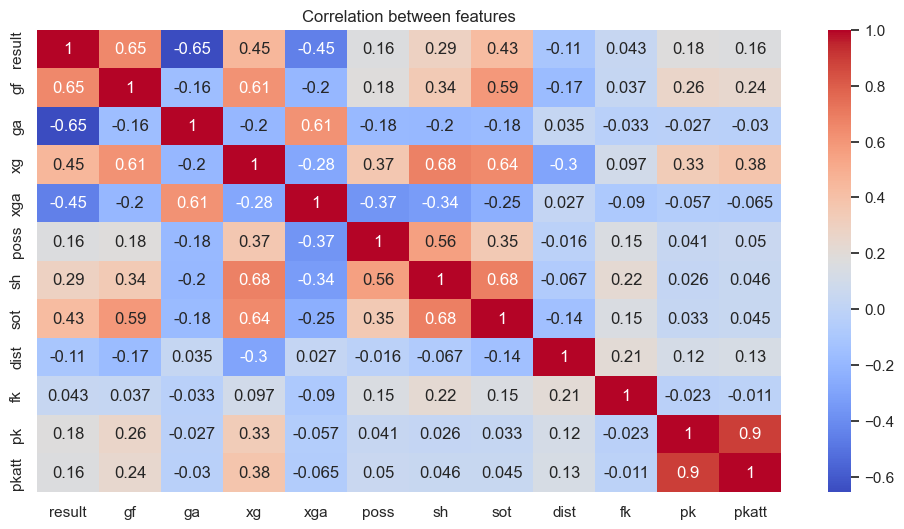

In [375]:
df= maches.copy()

# Sửa cột 'result' thành các giá trị số tương ứng với 'W', 'D', 'L'
df['result'] = df['result'].map({'W': 1, 'D': 0, 'L': -1})

# Hiển thị 2 dòng đầu tiên để kiểm tra kết quả
print(df[['result']].head())
df.drop(['round','venue','team','opponent','referee','formation','opp formation','year','month','local_hour','local_minute','day'],axis=1,inplace=True)
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.heatmap(df.corr(),annot=True,cmap='coolwarm').set(title='Correlation between features')

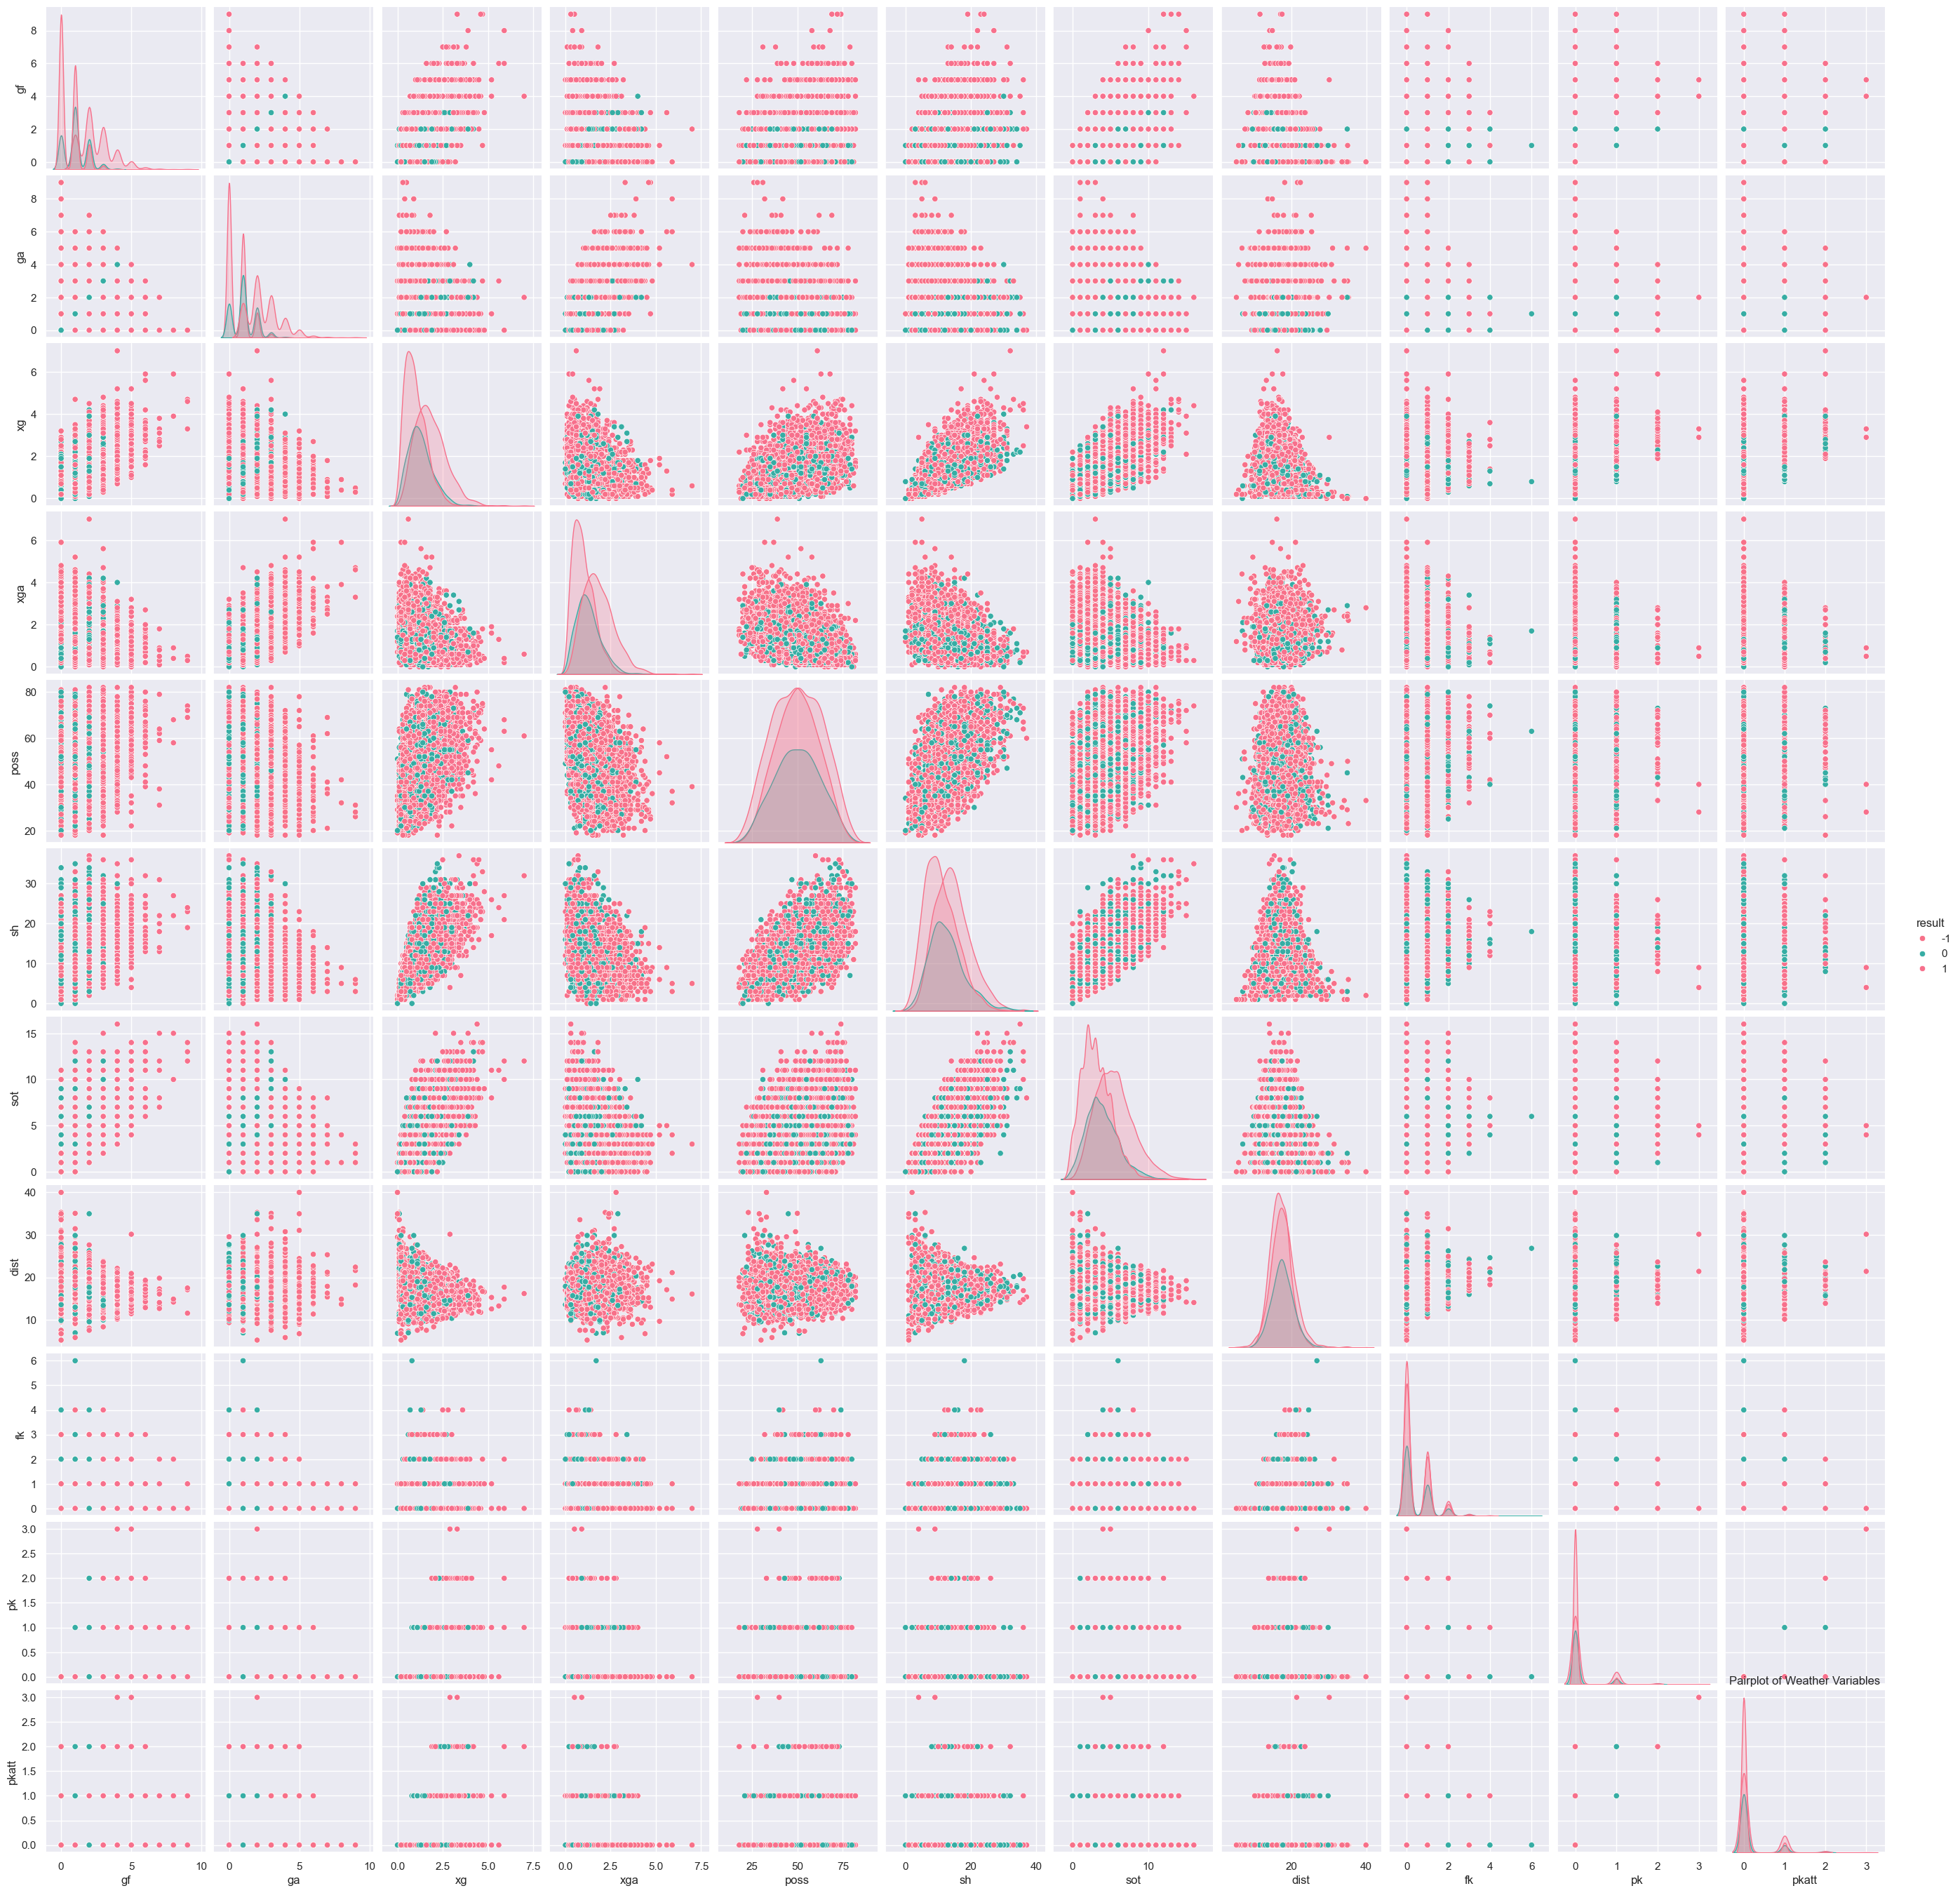

In [376]:
sns.pairplot(df, hue='result', palette='husl')
plt.title('Pairplot of Weather Variables')
plt.show()

Outliers for pkatt:
5       1
7       1
11      1
12      1
18      1
       ..
5874    1
5890    1
5910    1
5921    1
5942    1
Name: pkatt, Length: 729, dtype: int64
Outliers for pk:
5       1
7       1
11      1
12      1
18      1
       ..
5796    1
5809    2
5815    1
5874    1
5942    1
Name: pk, Length: 592, dtype: int64
Outliers for fk:
170     3
506     3
1015    3
1233    3
1602    3
1636    3
1665    4
1772    3
2095    3
2236    4
2256    3
2276    3
2397    3
2480    3
2707    3
2891    3
2990    3
3159    3
3177    3
3206    3
3357    4
3513    3
3709    3
3758    3
3775    3
3788    3
3805    4
3826    4
4091    3
4296    3
4330    3
4376    3
4443    3
4489    3
4529    3
4571    3
4635    3
4650    3
4710    3
4839    3
4863    3
5023    4
5220    4
5309    3
5311    3
5375    3
5395    3
5547    3
5580    3
5648    3
5688    6
5947    3
Name: fk, dtype: int64
Outliers for dist:
76       6.9
116     26.8
338     27.9
561     28.2
615      9.6
        ... 
5821     9.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1852\2994945844.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, ax=axs[row, col], palette="Blues")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1852\2994945844.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, ax=axs[row, col], palette="Blues")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1852\2994945844.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, ax=axs[row, col], palette="Blues")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18

Outliers for sot:
17      13
37      16
644     13
661     15
737     13
741     13
753     13
864     14
873     15
1615    13
2176    15
2218    13
2265    14
2970    13
2979    13
3841    14
4441    14
5315    13
5398    14
5404    14
Name: sot, dtype: int64
Outliers for poss:
Series([], Name: poss, dtype: int64)
Outliers for xga:
140     3.4
219     4.3
293     4.2
324     3.5
341     3.4
       ... 
5683    4.0
5711    3.4
5783    4.0
5891    3.8
5899    3.6
Name: xga, Length: 135, dtype: float64
Outliers for xg:
12      3.4
15      5.6
20      3.4
28      3.9
37      4.4
       ... 
5398    3.5
5403    4.0
5404    4.7
5595    3.9
5787    3.4
Name: xg, Length: 135, dtype: float64
Outliers for ga:
311     7
464     6
481     6
565     6
967     6
1026    6
1068    6
1203    6
1367    8
1388    6
1482    6
1500    7
1697    6
1889    6
1935    9
1974    6
2052    6
2114    6
2442    6
2722    6
2784    7
2792    6
2890    7
2960    6
2999    7
3237    6
3427    7
3472    9
4069    9

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1852\2994945844.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, ax=axs[row, col], palette="Blues")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1852\2994945844.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, ax=axs[row, col], palette="Blues")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1852\2994945844.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, ax=axs[row, col], palette="Blues")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18

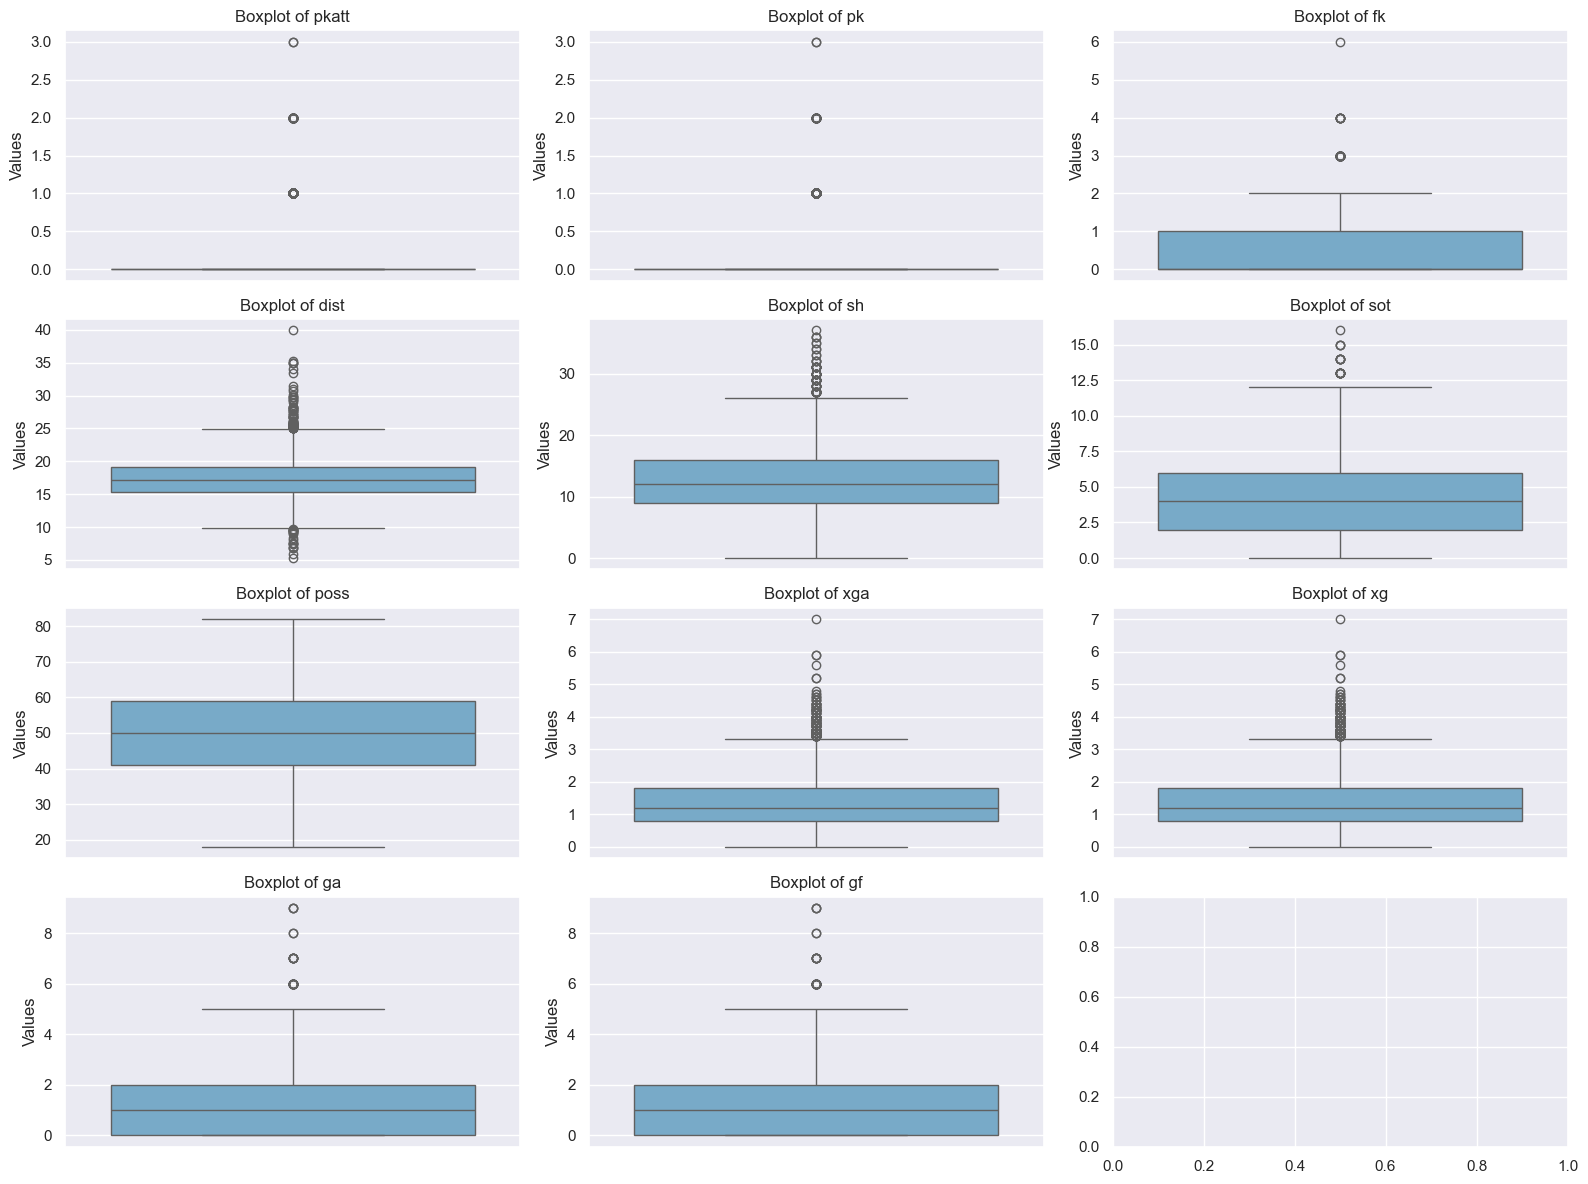

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

# Định nghĩa các cột bạn muốn vẽ boxplot
columns_to_plot = ['pkatt', 'pk', 'fk', 'dist', 'sh', 'sot', 'poss', 'xga', 'xg', 'ga', 'gf']

# Tạo subplot với 4 hàng và 3 cột
fig, axs = plt.subplots(4, 3, figsize=(16, 12))  # 4 hàng và 3 cột

# Lặp qua các cột và vẽ boxplot
for idx, column in enumerate(columns_to_plot):
    row = idx // 3  # Tính hàng của subplot
    col = idx % 3   # Tính cột của subplot
    
    # Tính toán các thông số của boxplot
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # In ra các giá trị outliers
    print(f"Outliers for {column}:")
    print(outliers[column])
    
    # Vẽ boxplot
    sns.boxplot(data=df, y=column, ax=axs[row, col], palette="Blues")

    # Thiết lập tiêu đề và nhãn cho mỗi subplot
    axs[row, col].set_title(f'Boxplot of {column}')
    axs[row, col].set_ylabel('Values')
    axs[row, col].set_xlabel('')

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()


In [378]:
# Hàm tính giới hạn và tìm outliers cho tất cả các cột
def find_outliers(df):
    limits = {}
    outliers = {}

    # Lặp qua tất cả các cột số trong DataFrame
    for column in df.select_dtypes(include=['float64', 'int64','int32','float32']).columns:
        # Tính Q1, Q3 và IQR cho mỗi cột
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Tính giới hạn dưới và trên
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Tìm các outliers (dữ liệu nằm ngoài giới hạn)
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Lưu giới hạn vào dictionary
        limits[column] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}

    return limits, outliers

# Tính giới hạn và tìm outliers cho tất cả các cột trong df_Dresden
limits, outliers = find_outliers(df)

# Tạo DataFrame cho giới hạn
limits_df = pd.DataFrame(limits).T  # Chuyển đổi dictionary limits thành DataFrame

# Tạo DataFrame cho outliers (số lượng outliers cho mỗi cột)
outliers_count = {column: len(outliers[column]) for column in outliers}
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Column', 'Outliers Count'])

# Hiển thị bảng giới hạn
print("Outlier Limits:")
print(limits_df)

# Hiển thị bảng outliers count
print("\nOutliers Count:")
print(outliers_df)


Outlier Limits:
        lower_bound  upper_bound
result         -4.0          4.0
gf             -3.0          5.0
ga             -3.0          5.0
xg             -0.7          3.3
xga            -0.7          3.3
poss           14.0         86.0
sh             -1.5         26.5
sot            -4.0         12.0
dist            9.7         24.9
fk             -1.5          2.5
pk              0.0          0.0
pkatt           0.0          0.0

Outliers Count:
    Column  Outliers Count
0   result               0
1       gf              37
2       ga              37
3       xg             135
4      xga             135
5     poss               0
6       sh              93
7      sot              20
8     dist              93
9       fk              52
10      pk             592
11   pkatt             729


In [379]:
maches.head(5)

,round,day,venue,result,gf,ga,opponent,xg,xga,poss,formation,opp formation,referee,sh,sot,dist,fk,pk,pkatt,team,month,year,local_hour,local_minute
0,Matchweek 1,17,Away,W,2,0,Ipswich Town,2.6,0.5,62,4-2-3-1,4-2-3-1,Tim Robinson,18,5,14.8,0,0,0,Liverpool,8,2024,12,30
1,Matchweek 2,25,Home,W,2,0,Brentford,2.5,0.5,62,4-2-3-1,4-4-2,Stuart Attwell,19,8,13.6,1,0,0,Liverpool,8,2024,16,30
2,Matchweek 3,1,Away,W,3,0,Manchester Utd,1.8,1.4,47,4-2-3-1,4-2-3-1,Anthony Taylor,11,3,13.4,0,0,0,Liverpool,9,2024,16,0
3,Matchweek 4,14,Home,L,0,1,Nott'ham Forest,0.9,0.4,68,4-2-3-1,4-2-3-1,Michael Oliver,14,5,14.9,0,0,0,Liverpool,9,2024,15,0
4,Matchweek 5,21,Home,W,3,0,Bournemouth,2.0,1.1,58,4-2-3-1,4-2-3-1,Tony Harrington,19,12,16.6,0,0,0,Liverpool,9,2024,15,0


In [393]:
# Bước 1: Xử lý cột phân loại (One-Hot Encoding cho các cột phân loại)
categorical_columns = ['round', 'venue', 'result', 'opponent', 'formation', 'opp formation', 'referee', 'team']

# Bước 2: Xử lý cột số (chuẩn hóa và xử lý giá trị thiếu)
numeric_columns = ['gf', 'ga', 'xg', 'xga', 'poss', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'month', 'year', 'local_hour', 'local_minute']

# Bước 3: Chuẩn bị bộ dữ liệu cho huấn luyện
X = maches[categorical_columns + numeric_columns ]
y = maches['result'].map({'W': 1, 'L': 0, 'D': 2})  # Mã hóa kết quả trận đấu

# Bước 4: Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Bước 7: Tạo pipeline cho các bước tiền xử lý và huấn luyện mô hình
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Xử lý giá trị thiếu cho cột số
            ('scaler', StandardScaler())  # Chuẩn hóa các cột số
        ]), numeric_columns ),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Xử lý giá trị thiếu cho cột phân loại
            ('encoder', OneHotEncoder(sparse_output=False))  # One-hot encoding cho các cột phân loại
        ]), categorical_columns)
    ]
)
models={
    "RandomForestClassifier":RandomForestClassifier(random_state=42),
    "SVC":SVC(random_state=42),
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42),
    "LogisticRegression":LogisticRegression(random_state=42),
    "GaussianNB":GaussianNB()
}
classifers=Pipeline(steps=[
    ("preprocess",preprocessor),
    ("classifier",RandomForestClassifier(random_state=42))
])
classifers.fit(X_train,y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gf', 'ga', 'xg', 'xga',
                                                   'poss', 'sh', 'sot', 'dist',
                                                   'fk', 'pk', 'pkatt', 'month',
                                                   'year', 'local_hour',
                                                   'local_minute']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['round', 'venue', 'result',
                                                   'opponent', 'formation',
                                                   'opp formation', 'referee',
                                                   'team'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [394]:
y_predict=classifers.predict(X_test)
for i,j in zip(y_test,y_predict):
    print(f"Actual {i} , Prediction : {j}")

Actual 2 , Prediction : 2
Actual 0 , Prediction : 0
Actual 2 , Prediction : 2
Actual 1 , Prediction : 1
Actual 1 , Prediction : 1
Actual 2 , Prediction : 2
Actual 1 , Prediction : 1
Actual 0 , Prediction : 0
Actual 0 , Prediction : 0
Actual 2 , Prediction : 2
Actual 0 , Prediction : 0
Actual 0 , Prediction : 0
Actual 1 , Prediction : 1
Actual 2 , Prediction : 2
Actual 2 , Prediction : 2
Actual 0 , Prediction : 0
Actual 1 , Prediction : 1
Actual 0 , Prediction : 0
Actual 0 , Prediction : 0
Actual 1 , Prediction : 1
Actual 2 , Prediction : 2
Actual 0 , Prediction : 0
Actual 2 , Prediction : 2
Actual 2 , Prediction : 2
Actual 0 , Prediction : 0
Actual 1 , Prediction : 1
Actual 0 , Prediction : 0
Actual 2 , Prediction : 2
Actual 0 , Prediction : 0
Actual 1 , Prediction : 1
Actual 0 , Prediction : 0
Actual 0 , Prediction : 0
Actual 1 , Prediction : 1
Actual 1 , Prediction : 1
Actual 1 , Prediction : 1
Actual 0 , Prediction : 0
Actual 1 , Prediction : 1
Actual 0 , Prediction : 0
Actual 0 , P

In [399]:
# Huấn luyện và đánh giá từng mô hình
for name, model in models.items():
    print(f"Best model: {name}")

    # Tính toán độ chính xác
    accuracy = accuracy_score(y_test, y_predict)
    print(f'Accuracy: {accuracy}')

    # In báo cáo phân loại chi tiết
    report = classification_report(y_test, y_predict)
    print('Classification Report:\n', report)

    # Tính toán và in ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_predict)
    print('Confusion Matrix:\n', cm)

    # Tính và in F1-score
    f1 = f1_score(y_test, y_predict, average='weighted')  # Hoặc 'macro' hoặc 'weighted' cho bài toán đa lớp
    print(f'F1 Score: {f1}')
    # print(model)

Best model: RandomForestClassifier
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00       455
           2       1.00      1.00      1.00       294

    accuracy                           1.00      1192
   macro avg       1.00      1.00      1.00      1192
weighted avg       1.00      1.00      1.00      1192

Confusion Matrix:
 [[443   0   0]
 [  0 455   0]
 [  0   0 294]]
F1 Score: 1.0
Best model: SVC
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00       455
           2       1.00      1.00      1.00       294

    accuracy                           1.00      1192
   macro avg       1.00      1.00      1.00      1192
weighted avg       1.00      1.00      1.00      1192

Confusion Matrix:
 [[443   0   0

In [401]:
# Định nghĩa các mô hình và các tham số để tìm kiếm (hyperparameter grid)
models = {
    "RandomForestClassifier": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "classifier__n_estimators":[50,100,200,500],
            "classifier__criterion":["gini","entropy","log_loss"],
            "classifier__max_depth":[None,5,10,15,20],
            "classifier__max_features":["sqrt","log2",None],
            "classifier__max_leaf_nodes":[None,5,10,15,20],
        }
    },
    "SVC": {
        "model": SVC(random_state=42),
        "params": {
            "classifier__C": [0.1, 1, 10],
            "classifier__kernel": ['linear', 'rbf'],
            "classifier__gamma": ['scale', 'auto']
        }
    },
    "DecisionTreeClassifier": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "classifier__max_depth": [None, 5, 10, 20],
            "classifier__min_samples_split": [2, 5, 10]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(random_state=42),
        "params": {
            "classifier__C": [0.1, 1, 10],
            "classifier__solver": ['lbfgs', 'liblinear']
        }
    },
    "GaussianNB": {
        "model": GaussianNB(),
        "params": {}  # GaussianNB không có nhiều tham số có thể tune
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42),
        "params": {
            "classifier__n_estimators": [50, 100, 200],
            "classifier__learning_rate": [0.01, 0.1, 0.3],
            "classifier__max_depth": [3, 5, 7],
            "classifier__subsample": [0.8, 1.0],
            "classifier__colsample_bytree": [0.8, 1.0]
        }
    },
    "KNeighborsClassifier": {
        "model": KNeighborsClassifier(),
        "params": {
            "classifier__n_neighbors": [3, 5, 7, 10],
            "classifier__weights": ['uniform', 'distance'],
            "classifier__metric": ['minkowski', 'euclidean', 'manhattan']
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "classifier__n_estimators": [50, 100, 200],
            "classifier__learning_rate": [0.01, 0.1, 1],
            "classifier__algorithm": ['SAMME', 'SAMME.R']
        }
    },
}
# Lặp qua các mô hình và thực hiện fine-tuning với RandomizedSearchCV hoặc GridSearchCV
best_models = {}

for model_name, model_info in models.items():
    print(f"Training {model_name}...")

    # Tạo pipeline cho từng mô hình
    pipeline = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("classifier", model_info["model"])
    ])

    # Tạo RandomizedSearchCV hoặc GridSearchCV cho từng mô hình
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=model_info["params"],
        n_iter=10,  # Chạy 10 lần tìm kiếm
        scoring='accuracy',  # Dùng độ chính xác để đánh giá
        cv=5,  # Sử dụng k-fold cross-validation
        n_jobs=-1,  # Sử dụng tất cả các lõi CPU
        verbose=5
    )

    # Huấn luyện mô hình và tìm kiếm tham số tốt nhất
    random_search.fit(X_train, y_train)

    # Lưu kết quả mô hình tốt nhất
    best_models[model_name] = random_search.best_estimator_

    # Đánh giá mô hình
    y_pred = random_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best score for {model_name}: {random_search.best_score_}")
    print(f"Accuracy: {accuracy}")

# In kết quả của mô hình tốt nhất
for model_name, model in best_models.items():
    print(f"Best model: {model_name}")

    # Tính toán độ chính xác
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # In báo cáo phân loại chi tiết
    report = classification_report(y_test, y_pred)
    print('Classification Report:\n', report)

    # Tính toán và in ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    # Tính và in F1-score
    f1 = f1_score(y_test, y_pred, average='macro')  # Hoặc 'macro' hoặc 'weighted' cho bài toán đa lớp
    print(f'F1 Score: {f1}')
    # print(model)

Training RandomForestClassifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters for RandomForestClassifier: {'classifier__n_estimators': 500, 'classifier__max_leaf_nodes': 10, 'classifier__max_features': None, 'classifier__max_depth': 15, 'classifier__criterion': 'log_loss'}
Best score for RandomForestClassifier: nan
Accuracy: 1.0
Training SVC...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters for SVC: {'classifier__kernel': 'rbf', 'classifier__gamma': 'scale', 'classifier__C': 1}
Best score for SVC: nan
Accuracy: 0.9991610738255033
Training DecisionTreeClassifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for DecisionTreeClassifier: {'classifier__min_samples_split': 5, 'classifier__max_depth': 10}
Best score for DecisionTreeClassifier: nan
Accuracy: 1.0
Training LogisticRegression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


Best parameters for LogisticRegression: {'classifier__solver': 'lbfgs', 'classifier__C': 0.1}
Best score for LogisticRegression: nan
Accuracy: 1.0
Training GaussianNB...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Best parameters for GaussianNB: {}
Best score for GaussianNB: nan
Accuracy: 1.0
Training XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters for XGBoost: {'classifier__subsample': 0.8, 'classifier__n_estimators': 100, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 1.0}
Best score for XGBoost: nan
Accuracy: 1.0
Training KNeighborsClassifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters for KNeighborsClassifier: {'classifier__weights': 'uniform', 'classifier__n_neighbors': 7, 'classifier__metric': 'minkowski'}
Best score for KNeighborsClassifier: nan
Accuracy: 0.9546979865771812
Training AdaBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__algorithm': 'SAMME.R'}
Best score for AdaBoost: nan
Accuracy: 1.0
Best model: RandomForestClassifier
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00       455
           2       1.00      1.00      1.00       294

    accuracy                           1.00      1192
   macro avg       1.00      1.00      1.00      1192
weighted avg       1.00      1.00      1.00      1192

Confusion Matrix:
 [[443   0   0]
 [  0 455   0]
 [  0   0 294]]
F1 Score: 1.0
Best model: SVC
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00       455
           2       1.00      1.00      1.00       294

    accuracy      